<a href="https://colab.research.google.com/github/anyfish/Travel_Insurance/blob/main/Travel_Insurance_(martin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstracto

Una empresa de viajes ofrece un paquete de seguros de viaje a sus clientes.

La empresa necesitas saber que clientes estarian interesados en comprarlo según el historial de su base de datos.

El seguro se ofrecio a algunos de los clientes en 2019 y los datos proporcionados se extrajeton del rendimeinto/ventas del paquete en ese periodo.
Los datos proporcionan para casi 2000 de sus clientes anteriores y se requiere que construya un modelo inteligente que pueda predecir si el cliente estará insteresado en comprar el paquete de seguro de viaje en función de ciertos parametros que se detallan a continuación.

# Librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Vsiaualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

# Datos
## Categorias
- **Edad:** edad del cliente.
- **Tipo de Empleo:** sector en el que esta empleado el cliente.
- **Graduado o No:** si el cliente es graduado universitario.
- **Ingreso Anual:** el ingres anual del cliente en rupias indias [redondeado a las 50 mil rupias más cercanas.
- **Miembros de Familia:** número de miembros en la familia del cliente.
- **Enfermedad Crónica:** si el cliente sufre de alguna enfermedad importante o condicionante como diabetes, presión arterial alta o asma, etc.
- **Viajero Frecuente:** datos derivados del historial de reserva de boletos aéreos del cliente en al menos 4 instancias diferentes en los ultimos 2 años (2017-2019).
- **EverTravelledAbroad:** si el cliente en otra aerolina a vijado al extranjero.
- **Seguro de Viaje:** si el cliente compro un paquete de seguro de viaje durante la oferta de lanzamiento celebrado en 2019.

In [ ]:
trv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/1-Predicción_de_seguro_de_viajes/Travel_Insurance_Prediction.csv')
trv.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


# Procesamiento

In [ ]:
trv.drop(columns=['Unnamed: 0'], inplace = True)

## Revisión de NA columns

In [ ]:
trv.isna().any()

Age                    False
Employment Type        False
GraduateOrNot          False
AnnualIncome           False
FamilyMembers          False
ChronicDiseases        False
FrequentFlyer          False
EverTravelledAbroad    False
TravelInsurance        False
dtype: bool

## Revisión de Valores Infinitos

In [ ]:
trv.isin([np.inf, - np.inf]).any()

Age                    False
Employment Type        False
GraduateOrNot          False
AnnualIncome           False
FamilyMembers          False
ChronicDiseases        False
FrequentFlyer          False
EverTravelledAbroad    False
TravelInsurance        False
dtype: bool

## Revisión de Tipos de Categorias

In [ ]:
trv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


## Revisión de Valores en Categorias del Tipo de Objeto

In [ ]:
a = trv['Employment Type'].value_counts()
b = trv['GraduateOrNot'].value_counts()
c = trv['FrequentFlyer'].value_counts()
d = trv['EverTravelledAbroad'].value_counts()

print(f"Employment Type:\n{a}GraduateOrNot:\n\n{b},\n\nFrequentFlyer\n{c},\n\nEverTravelledAbroad:\n{d}")

Employment Type:
Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64GraduateOrNot:

Yes    1692
No      295
Name: GraduateOrNot, dtype: int64,

FrequentFlyer
No     1570
Yes     417
Name: FrequentFlyer, dtype: int64,

EverTravelledAbroad:
No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64


## Codificar Categorias del Tipo Object con Valores entre 0 y 1

In [ ]:
trv_enc = trv.copy()

def enc_cat(feature):
  trv_enc[feature] = trv_enc[feature].replace({'Yes': 1, 'No':0})

enc_cat('GraduateOrNot')
enc_cat('FrequentFlyer')
enc_cat('EverTravelledAbroad')

In [ ]:
trv_enc = pd.get_dummies(trv_enc, columns=['Employment Type'], drop_first=True, prefix='Et', prefix_sep=':')

# Data Set Procesado

In [ ]:
df = trv_enc.copy()
df

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Et:Private Sector/Self Employed
0,31,1,400000,6,1,0,0,0,0
1,31,1,1250000,7,0,0,0,0,1
2,34,1,500000,4,1,0,0,1,1
3,28,1,700000,3,1,0,0,0,1
4,28,1,700000,8,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1982,33,1,1500000,4,0,1,1,1,1
1983,28,1,1750000,5,1,0,1,0,1
1984,28,1,1150000,6,1,0,0,0,1
1985,34,1,1000000,6,0,1,1,1,1


# Analisis

## Correlación

### Matriz

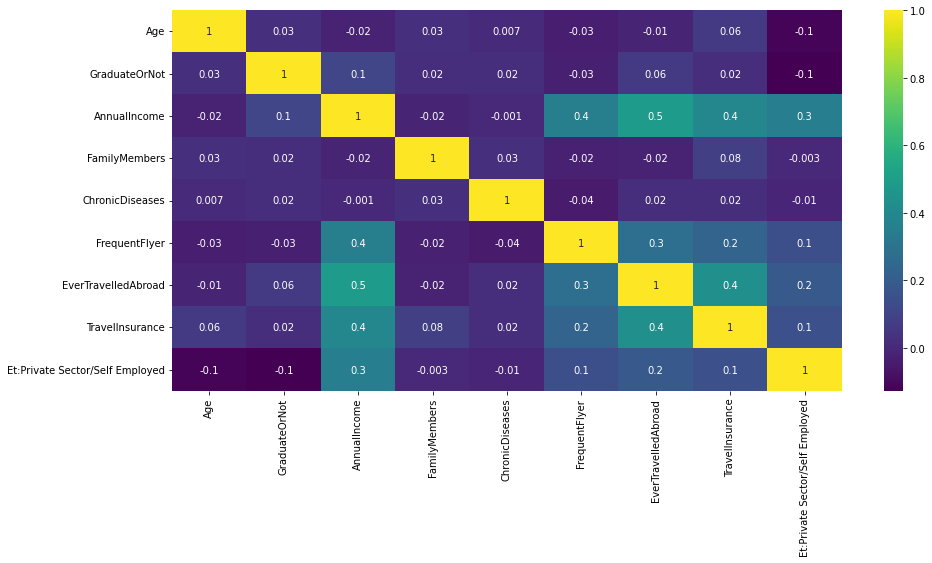

In [ ]:
plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap='viridis', cbar=True)

### Clientes Asegurados por Media de % de Correlación

In [ ]:
df_corr = df.corr()
df_corr['TravelInsurance'].sort_values(ascending=False).head(5)

TravelInsurance                    1.000000
EverTravelledAbroad                0.433183
AnnualIncome                       0.396763
FrequentFlyer                      0.232103
Et:Private Sector/Self Employed    0.147847
Name: TravelInsurance, dtype: float64

### Categorias por Media de % de Correlación

In [ ]:
df_corr.mean().sort_values(ascending=True).head(5)

Age                                0.104642
ChronicDiseases                    0.115265
FamilyMembers                      0.121497
GraduateOrNot                      0.122396
Et:Private Sector/Self Employed    0.173858
dtype: float64

## Descriptivo

In [ ]:
df.describe()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Et:Private Sector/Self Employed
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323,0.713135
std,2.913308,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332,0.452412
min,25.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,32.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,35.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Univariable

### Histogramas

Text(0.5, 1.0, '\nMiembros de Familia\n.::.\nMedia = 5 integrantes\n')

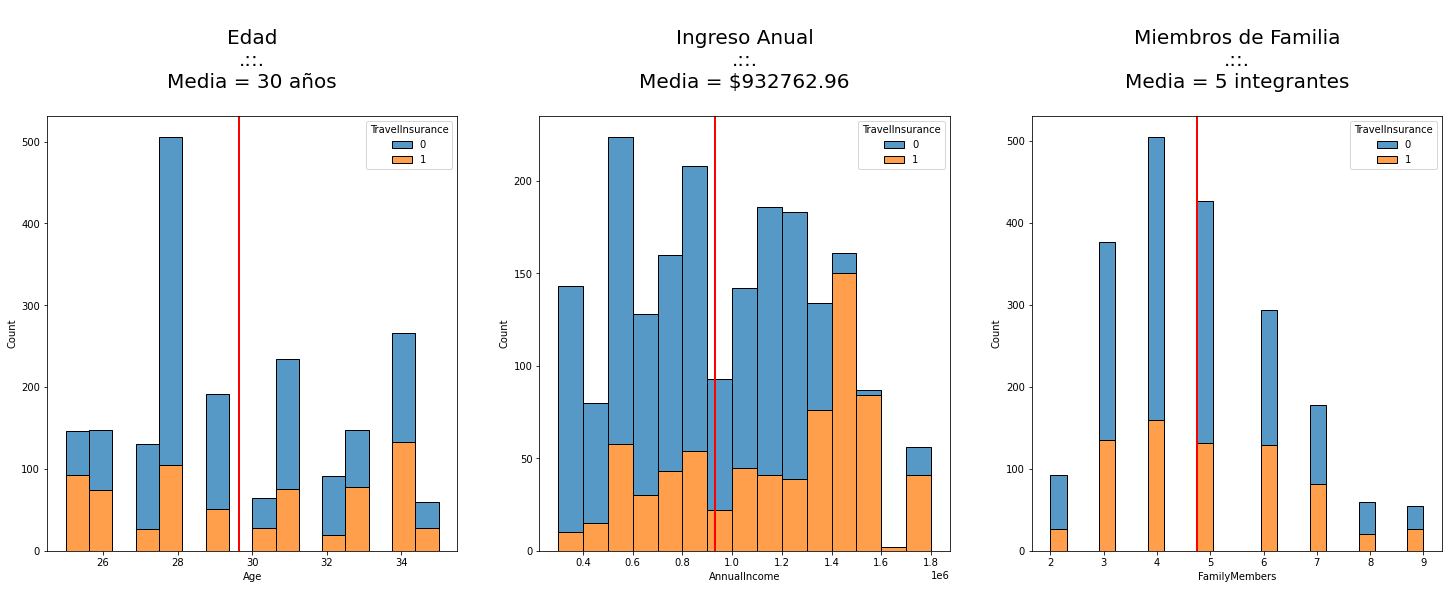

In [ ]:
f, axs = plt.subplots(nrows=1, ncols=3, figsize=(25,8))

sns.histplot(data=df, x='Age', hue='TravelInsurance', multiple='stack', ax=axs[0])
axs[0].axvline(df['Age'].mean(), color='red', linewidth=2.0)
axs[0].set_title(f"\nEdad\n.::.\nMedia = {df['Age'].mean():.0f} años\n", fontsize=20)

sns.histplot(data=df, x='AnnualIncome', hue='TravelInsurance', multiple='stack', ax=axs[1])
axs[1].axvline(df['AnnualIncome'].mean(), color='red', linewidth=2.0)
axs[1].set_title(f"\nIngreso Anual\n.::.\nMedia = ${df['AnnualIncome'].mean():.2f}\n", fontsize=20)

sns.histplot(data=df, x='FamilyMembers', hue='TravelInsurance', multiple='stack', ax=axs[2])
axs[2].axvline(df['FamilyMembers'].mean(), color='red', linewidth=2.0)
axs[2].set_title(f"\nMiembros de Familia\n.::.\nMedia = {df['FamilyMembers'].mean():.0f} integrantes\n", fontsize=20)

### Graficos de Pastel

Text(0.5, 1.0, '\nCon Enfermedad Cronica')

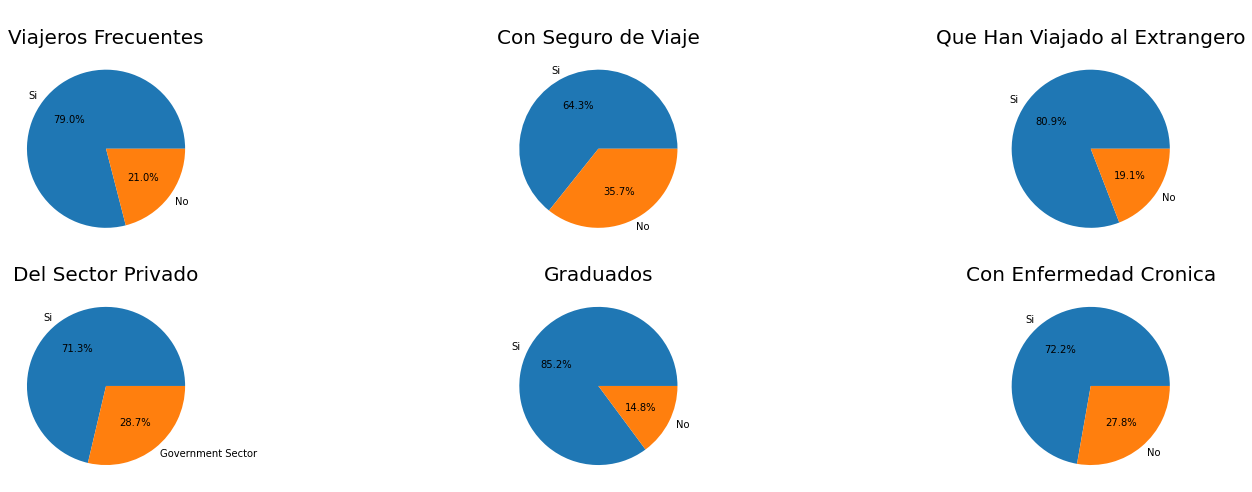

In [ ]:
f, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,8))

axs[0,0].pie(df['FrequentFlyer'].value_counts(), autopct='%1.1f%%', labels=['Si', 'No'])
axs[0,0].set_title('\nViajeros Frecuentes', fontsize=20)

axs[0,1].pie(df['TravelInsurance'].value_counts(), labels=['Si', 'No'], autopct='%1.1f%%')
axs[0,1].set_title('\nCon Seguro de Viaje', fontsize=20)

axs[0,2].pie(df['EverTravelledAbroad'].value_counts(), labels=['Si', 'No'], autopct='%1.1f%%')
axs[0,2].set_title('\nQue Han Viajado al Extrangero', fontsize=20)

axs[1,0].pie(df['Et:Private Sector/Self Employed'].value_counts(), labels=['Si', 'Government Sector'], autopct='%1.1f%%')
axs[1,0].set_title('\nDel Sector Privado', fontsize=20)

axs[1,1].pie(df['GraduateOrNot'].value_counts(), autopct='%1.1f%%', labels=['Si', 'No'])
axs[1,1].set_title('\nGraduados', fontsize=20)

axs[1,2].pie(df['ChronicDiseases'].value_counts(), autopct='%1.1f%%', labels=['Si', 'No'])
axs[1,2].set_title('\nCon Enfermedad Cronica', fontsize=20)

### Bivariante y Univariado

In [ ]:
df_a = df.copy()
df_a['N_Clientes'] = 1
df_b = df_a.groupby('Age').sum()
df_b = df_b[['TravelInsurance','N_Clientes', 'EverTravelledAbroad', 'FrequentFlyer']].reset_index()
df_b['%_Asegurados'] = (df_b['TravelInsurance'] / df_b['N_Clientes'] * 100).round(2)
df_b['%_V_al_EA'] = (df_b['EverTravelledAbroad'] / df_b['N_Clientes'] * 100).round(2)
df_b['%_VF_A'] = (df_b['FrequentFlyer'] / df_b['N_Clientes'] * 100).round(2)
df_c = df.groupby('Age').mean()
df_c = pd.DataFrame(df_c['AnnualIncome']).reset_index(drop=True).round(2)
df_age = pd.concat([df_b, df_c], axis=1)
df_age.sort_values('%_Asegurados', ascending=False)

,Age,TravelInsurance,N_Clientes,EverTravelledAbroad,FrequentFlyer,%_Asegurados,%_V_al_EA,%_VF_A,AnnualIncome
0,25,92,146,51,70,63.01,34.93,47.95,1303424.66
8,33,78,148,42,26,52.70,28.38,17.57,892905.41
1,26,74,148,64,35,50.00,43.24,23.65,1023648.65
9,34,133,266,62,77,50.00,23.31,28.95,1078759.40
10,35,28,60,6,9,46.67,10.00,15.00,880000.00
5,30,28,65,14,20,43.08,21.54,30.77,779230.77
6,31,75,234,62,36,32.05,26.50,15.38,989102.56
4,29,51,192,21,28,26.56,10.94,14.58,970572.92
7,32,19,91,7,19,20.88,7.69,20.88,692307.69
3,28,105,506,43,80,20.75,8.50,15.81,811857.71


In [ ]:
f = px.pie(df_age, names='Age', values='N_Clientes', color='%_Asegurados', hole=.4, title='% de Participación de Edades de Clientes')
f.update_traces(textinfo='percent+label', textfont_size=17)

In [ ]:
px.bar(df_age, x='Age', y='%_Asegurados', text_auto=True, title='Edades con mayor % de Clientes Asegurados')

#### Clientes que Viajan al Extrangero y Contratan un Seguro

In [ ]:
df_cr = pd.crosstab(df['EverTravelledAbroad'], columns=df['TravelInsurance'], margins=True,  normalize='all').round(2)
df_cr

TravelInsurance,0,1,All
EverTravelledAbroad,,,
0,0.60,0.21,0.81
1,0.04,0.15,0.19
All,0.64,0.36,1.00


In [ ]:
df_cr = pd.crosstab(df['EverTravelledAbroad'], columns=df['TravelInsurance'], margins=True, normalize='index').round(2)
px.bar(df_cr, title='El 19% de los clientes fueron al extrangero y el 78% de ellos contrataron un seguro', text_auto=True)

In [ ]:
px.bar(df_age, x='Age', y='%_V_al_EA', text_auto=True, labels={'%_V_al_EA':'% Viajan al Extrangero Asegurados'}, title='Edades con mayor % de Clientes Asegurados que Van al Extrangero')

#### Ingreso anual de los clientes que contratan un seguro

In [ ]:
df_age.sort_values('AnnualIncome', ascending=False)

,Age,TravelInsurance,N_Clientes,EverTravelledAbroad,FrequentFlyer,%_Asegurados,%_V_al_EA,%_VF_A,AnnualIncome
0,25,92,146,51,70,63.01,34.93,47.95,1303424.66
9,34,133,266,62,77,50.00,23.31,28.95,1078759.40
1,26,74,148,64,35,50.00,43.24,23.65,1023648.65
6,31,75,234,62,36,32.05,26.50,15.38,989102.56
4,29,51,192,21,28,26.56,10.94,14.58,970572.92
8,33,78,148,42,26,52.70,28.38,17.57,892905.41
10,35,28,60,6,9,46.67,10.00,15.00,880000.00
3,28,105,506,43,80,20.75,8.50,15.81,811857.71
5,30,28,65,14,20,43.08,21.54,30.77,779230.77
2,27,27,131,8,17,20.61,6.11,12.98,743893.13


In [ ]:
px.bar(df_age, x='Age', y='AnnualIncome', color='%_Asegurados', text_auto=True, title='Promedio de Ingreso Anual por Edad y por el % de Asegurados')

#### Viajeros Frecuentes con Seguro de Viaje

In [ ]:
df_age.sort_values('%_VF_A', ascending=False)

,Age,TravelInsurance,N_Clientes,EverTravelledAbroad,FrequentFlyer,%_Asegurados,%_V_al_EA,%_VF_A,AnnualIncome
0,25,92,146,51,70,63.01,34.93,47.95,1303424.66
5,30,28,65,14,20,43.08,21.54,30.77,779230.77
9,34,133,266,62,77,50.00,23.31,28.95,1078759.40
1,26,74,148,64,35,50.00,43.24,23.65,1023648.65
7,32,19,91,7,19,20.88,7.69,20.88,692307.69
8,33,78,148,42,26,52.70,28.38,17.57,892905.41
3,28,105,506,43,80,20.75,8.50,15.81,811857.71
6,31,75,234,62,36,32.05,26.50,15.38,989102.56
10,35,28,60,6,9,46.67,10.00,15.00,880000.00
4,29,51,192,21,28,26.56,10.94,14.58,970572.92


In [ ]:
df_VF = pd.crosstab(df['FrequentFlyer'], columns=df['TravelInsurance'], margins=True, normalize='all').round(2)
df_VF

TravelInsurance,0,1,All
FrequentFlyer,,,
0,0.55,0.24,0.79
1,0.09,0.12,0.21
All,0.64,0.36,1.00


In [ ]:
df_VF = pd.crosstab(df['FrequentFlyer'], columns=df['TravelInsurance'], margins=True, normalize='index').round(2)
px.bar(df_VF, text_auto=True, title='El 21% son Clientes Frecuentes y el 57% de ellos contrataron un seguro')

In [ ]:
px.bar(df_age, x='Age', y='%_VF_A', text_auto=True, title='Edades con mayor % de Clientes Asegurados que son Clientes Frecuentes')